# 1. Introduction
## 1.1 Summary
A market basket analysis would help understand the purchase behavior of customers. In a shopping cart, normally, there are several items as a combination depending on the preference of different customers. Knowing what items would come after particular items, shelf planners would have better ideas of what items should be put together. Also, retail managers would better understand what sorts of items should be stored in the warehouse to prevent insufficiency.

## 1.2 Analytics Tool and Dataset
This analysis uses Python as an analytics tool. 

There 2 given datasets. One contains 38765 transaction records with member IDs, transaction dates, and item names. The other one contains 14963 rows with only the items per transaction. 

# 2. Prepare
## 2.1 Analysis Plan
The analysis plan is to answer the questions.

1. What are the most frequently sold items?
2. what are the consequents of the chosen items?
3. How confident do the consequents come after the items?
4. What are the most important items that should always be in the store?
5. How the item network looks like?
6. What is the difference between analyzing the data based on customer ID and different transactions?

## 2.2 Method

This analysis will load the 2 datasets. The first one with member IDs will be used for creating a basket model based on IDs. The other one will be used for creating a model based on transactions. Literately, the total number of sold items should be the same. The analysis steps are as below.

1. Prepare the 2 .csv files
2. A bar chart to see the most frequently sold items
3. A quick look at the relationship between items
4. Select an item to proceed a further analysis
5. A heatmap to review the association between antecedents and consequents
6. A network graphic to know the connections of the selected item

# 3. Process
First of all, load the essential packages and read the 2 datasets.

In [ ]:
import numpy as np 
import pandas as pd 
from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
# import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly

from plotly.graph_objs import *

In [ ]:
df = pd.read_csv("/Users/jaypatel/Documents/University Material/Semester 8/IBM Project Code Files/Market Basket Analysis (MBA)/data/Groceries data.csv")
bk = pd.read_csv("/Users/jaypatel/Documents/University Material/Semester 8/IBM Project Code Files/Market Basket Analysis (MBA)/data/basket.csv")
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [ ]:
# review the unique values in the member ID and item columns
print(len(df['Member_number'].unique()))
print(len(df['itemDescription'].unique()))

3898
167


In [ ]:
# review the value counts
freq_items = df['itemDescription'].value_counts()
freq_items.head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [5]:
# plot a bar chart to see the top sold items
fig = px.bar(data_frame=freq_items.head(40), title='Top 40 Items', color=freq_items.head(40),
                 labels={
                     "index": "Items",
                     "values": "Quantity",
                     'lift': 'Lift'
                 })
fig.update_layout(title_x=0.5, title_y=0.86)
fig.show()

In [6]:
# list items by member IDs
user_id = df['Member_number'].unique()
items = [list(df.loc[df['Member_number'] == id, 'itemDescription']) for id in user_id]
print(items[0])

['tropical fruit', 'long life bakery product', 'meat', 'sugar', 'rolls/buns', 'semi-finished bread', 'whole milk', 'citrus fruit', 'candy', 'napkins']


In [7]:
# create a item matrix
TE = TransactionEncoder()
TE.fit(items)
item_transformed = TE.transform(items)
item_matrix = pd.DataFrame(item_transformed, columns = TE.columns_)
item_matrix.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [8]:
# get the support value by Apriori algorithm
freq_items = apriori(item_matrix, min_support=0.01, use_colnames=True, max_len=2)
freq_items.sort_values(by = "support", ascending = False)

,support,itemsets
113,0.458184,(whole milk)
69,0.376603,(other vegetables)
84,0.349666,(rolls/buns)
94,0.313494,(soda)
114,0.282966,(yogurt)
...,...,...
414,0.010005,"(butter milk, frankfurter)"
705,0.010005,"(dog food, whole milk)"
882,0.010005,"(newspapers, hygiene articles)"
1106,0.010005,"(waffles, pork)"


In [9]:
choice = input("Enter 1st Product")
rules = association_rules(freq_items, metric = "confidence", min_threshold = 0)
selected = rules[rules.antecedents==frozenset({choice})]

In [10]:
print("Available Combos")
print(type(selected))
selected

Available Combos
<class 'pandas.core.frame.DataFrame'>


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396
71,(beef),(berries),0.119548,0.079785,0.011288,0.094421,1.183445,0.001750,1.016162
73,(beef),(bottled beer),0.119548,0.158799,0.020780,0.173820,1.094587,0.001796,1.018180
74,(beef),(bottled water),0.119548,0.213699,0.025911,0.216738,1.014220,0.000363,1.003880
76,(beef),(brown bread),0.119548,0.135967,0.018984,0.158798,1.167916,0.002729,1.027141
79,(beef),(butter),0.119548,0.126475,0.020523,0.171674,1.357372,0.005403,1.054566
81,(beef),(butter milk),0.119548,0.064905,0.010775,0.090129,1.388624,0.003015,1.027722
83,(beef),(canned beer),0.119548,0.165213,0.018728,0.156652,0.948185,-0.001023,0.989849
85,(beef),(chicken),0.119548,0.100564,0.011544,0.096567,0.960246,-0.000478,0.995575
87,(beef),(chocolate),0.119548,0.086455,0.014623,0.122318,1.414819,0.004287,1.040861


In [11]:
combos = selected.head(5)
combos

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396
71,(beef),(berries),0.119548,0.079785,0.011288,0.094421,1.183445,0.001750,1.016162
73,(beef),(bottled beer),0.119548,0.158799,0.020780,0.173820,1.094587,0.001796,1.018180
74,(beef),(bottled water),0.119548,0.213699,0.025911,0.216738,1.014220,0.000363,1.003880
76,(beef),(brown bread),0.119548,0.135967,0.018984,0.158798,1.167916,0.002729,1.027141


In [12]:
df[df.Member_number==2517]

,Member_number,Date,itemDescription,year,month,day,day_of_week
1017,2517,2015-04-07,pip fruit,2015,4,7,1
1382,2517,2015-01-28,root vegetables,2015,1,28,2
3467,2517,2015-01-28,sausage,2015,1,28,2
3618,2517,2015-03-22,napkins,2015,3,22,6
5152,2517,2015-12-12,tropical fruit,2015,12,12,5
5201,2517,2015-09-29,other vegetables,2015,9,29,1
6098,2517,2015-03-20,beef,2015,3,20,4
8589,2517,2015-03-22,tropical fruit,2015,3,22,6
8979,2517,2014-12-05,citrus fruit,2014,12,5,4
12858,2517,2014-02-26,whipped/sour cream,2014,2,26,2


In [13]:
# create a datafram with product support, confidence , and lift values
rules = association_rules(freq_items, metric = "confidence", min_threshold = 0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672
2,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769
3,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933
4,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,0.004517,1.078960
...,...,...,...,...,...,...,...,...,...
2247,(whole milk),(white wine),0.458184,0.044125,0.023602,0.051512,1.167400,0.003384,1.007788
2248,(yogurt),(white wine),0.282966,0.044125,0.016419,0.058024,1.314976,0.003933,1.014754
2249,(white wine),(yogurt),0.044125,0.282966,0.016419,0.372093,1.314976,0.003933,1.141944
2250,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185


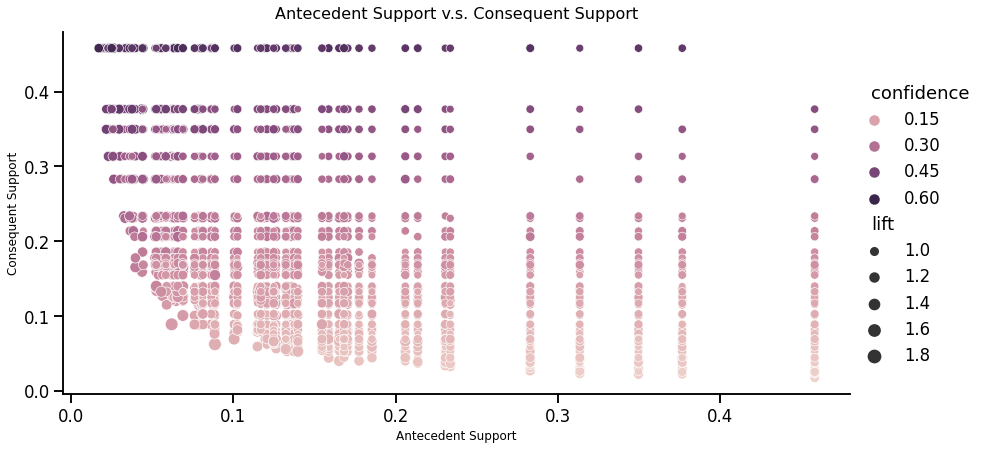

In [14]:
# take a quick look at the distribution of the product combination
sns.set_context("talk")
sns.relplot(x='antecedent support', y='consequent support', data=rules, 
            size='lift', hue='confidence', height=6, aspect=2)
plt.title("Antecedent Support v.s. Consequent Support", fontsize=16, y=1.02)
plt.xlabel('Antecedent Support', fontsize=12)
plt.ylabel('Consequent Support', fontsize=12)
plt.show()

In [15]:
# add a column for a Zhang's core
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values, 
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

rules_zhangs_list = zhangs_rule(rules)
rules = rules.assign(zhang = rules_zhangs_list)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396,0.122392
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672,0.116940
2,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769,0.192815
3,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933,0.176014
4,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,0.004517,1.078960,0.230217


# 4. Analyze
## 4.1 Dataset-1 (Customer IDs, Transaction dates, and Items)
So far, the datafame is ready for a further analysis.

In [16]:
# regarding the whole mike has the highest support, choose it as the item for the basket analysis
rules_sel = rules[rules["antecedents"].apply(lambda x: "whole milk" in x)]
rules_sel.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
1869,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
2049,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
2187,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184
2251,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640
2227,(whole milk),(tropical fruit),0.458184,0.233710,0.116470,0.254199,1.087672,0.009388,1.027473,0.148768
...,...,...,...,...,...,...,...,...,...,...
1313,(whole milk),(frozen dessert),0.458184,0.023089,0.012057,0.026316,1.139766,0.001479,1.003314,0.226326
749,(whole milk),(canned vegetables),0.458184,0.020523,0.011544,0.025196,1.227674,0.002141,1.004793,0.342277
2087,(whole milk),(salt),0.458184,0.022832,0.011288,0.024636,1.079004,0.000826,1.001849,0.135137
1179,(whole milk),(dog food),0.458184,0.017188,0.010005,0.021837,1.270428,0.002130,1.004752,0.392871


In [17]:
# get the most important 5 items that customers would buy after purchasing whole milk 
rules_support = rules_sel['support'] >= rules_sel['support'].quantile(q = 0.95)
rules_confi = rules_sel['confidence'] >= rules_sel['confidence'].quantile(q = 0.95)
rules_lift = rules_sel['lift'] > 1
rules_zhang = rules_sel['zhang'] > 0
rules_best = rules_sel[rules_support & rules_confi & rules_lift & rules_zhang]
rules_best

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
1869,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
2049,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
2187,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184
2227,(whole milk),(tropical fruit),0.458184,0.233710,0.116470,0.254199,1.087672,0.009388,1.027473,0.148768
2251,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640


In [18]:
# prepare the top 10 persentile items for visualization
rules_eda = rules.copy(deep=True)
rules_support_eda = rules_eda['support'] >= rules_eda['support'].quantile(q = 0.9)
rules_confi_eda = rules_eda['confidence'] >= rules_eda['confidence'].quantile(q = 0.9)
rules_lift_eda = rules_eda['lift'] > 1
rules_zhang_eda = rules_eda['zhang'] > 0
rules_best_eda = rules_eda[rules_support_eda & rules_confi_eda & rules_lift_eda & rules_zhang_eda]
rules_best_eda.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
110,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
136,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
298,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
307,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,0.007582,1.079240,0.142829
330,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297


In [19]:
# remove the parentheses in the antecedents and consequents columns
rules_best_eda['antecedents'] = rules_best_eda['antecedents'].apply(lambda a: ', '.join(list(a)))
rules_best_eda['consequents'] = rules_best_eda['consequents'].apply(lambda a: ', '.join(list(a)))
rules_best_eda.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
110,beef,other vegetables,0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
136,beef,whole milk,0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
298,bottled beer,other vegetables,0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
307,bottled beer,rolls/buns,0.158799,0.349666,0.063109,0.397415,1.136555,0.007582,1.079240,0.142829
330,bottled beer,whole milk,0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297


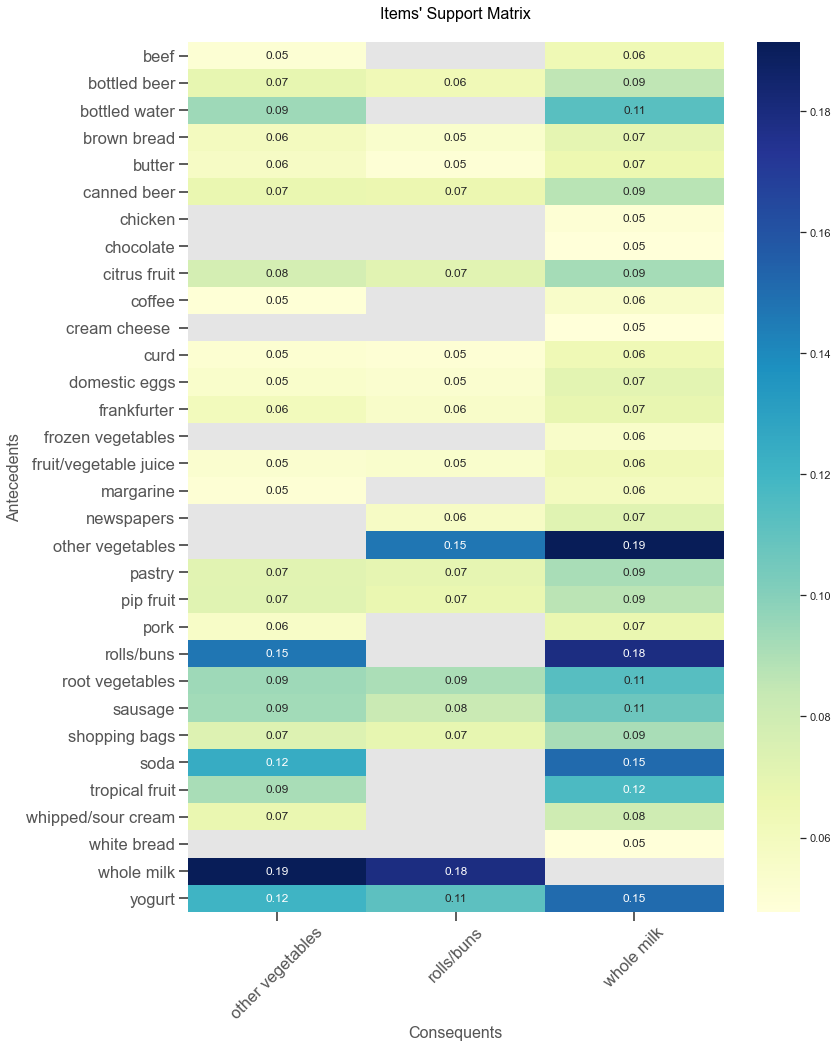

In [20]:
# plot a heatmap to know how strong the association is based on lift values
pivot_support = rules_best_eda.pivot(index='antecedents', columns='consequents', values='support')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(12, 16))
sns.set()
ax = sns.heatmap(data=pivot_support, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Items' Support Matrix", fontsize=16, y=1.02)
ax.set_xlabel("Consequents",fontsize=16)
ax.set_ylabel("Antecedents",fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show() 

In [21]:
# plot a heatmap to know how strong the association is regarding lift values
pivot_confidence = rules_best_eda.pivot(index='antecedents', columns='consequents', values='confidence')

fig = ff.create_annotated_heatmap(pivot_confidence.to_numpy().round(2), 
                                  x=list(pivot_confidence.columns), 
                                  y=list(pivot_confidence.index), 
                                  colorscale=['grey', 'orange', 'red'], 
                                  font_colors=['white', 'white', 'white'])
fig.update_layout(
    template='simple_white',
    autosize=False,
    width=800,
    height=800,
    title="Lift Matrix",
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    legend_title="Legend Title",
    font=dict(
        family="Caliber",
        size=14,
        color="Black"
    )
)
fig.update_layout(title_x=0.22, title_y=0.98)
fig.update_traces(showscale=True)
fig.show()


In [ ]:
#Scatter plot to see where the best consequents of whole milk are
rules_fix = rules.copy(deep=True)
rules_fix['antecedents'] = rules_fix['antecedents'].apply(lambda a: ', '.join(list(a)))
rules_fix['consequents'] = rules_fix['consequents'].apply(lambda a: ', '.join(list(a)))

fig=go.Figure()
fig.add_trace(
    go.Scatter(x=rules_fix['support'], y=rules_fix['zhang'], name='All Combinations', mode='markers', opacity=0.3)
)
fig.add_trace(
    go.Scatter(x=rules_best['support'], y=rules_best['zhang'], name='Top 5 Consequents', mode='markers')
)

annotaion_01={'x':'0.191380', 'y':'0.181562', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Other Vegetables', 'textangle':-90, 'font':{'size':12, 'color':'green'}}
annotaion_02={'x':'0.178553', 'y':'0.189591', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Rolls/buns', 'textangle':-90,'font':{'size':12, 'color':'green'}}
annotaion_03={'x':'0.151103', 'y':'0.091184', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Soda', 'textangle':-90,'font':{'size':12, 'color':'green'}}
annotaion_04={'x':'0.116470', 'y':'0.148768', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Tropical Fruit', 'textangle':-90,'font':{'size':12, 'color':'green'}}
annotaion_05={'x':'0.150590', 'y':'0.256640', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Yogurt', 'textangle':-90,'font':{'size':12, 'color':'green'}}

fig.update_layout({ 
    'annotations':[annotaion_01, annotaion_02, annotaion_03,
      annotaion_04, annotaion_05], 
      'showlegend':True, 'legend':{'x':0.76, 'y':0.04, 'bgcolor':'rgb(246, 228, 129)'}
      })
fig.update_xaxes(
        title_text = "Support",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "Confidence",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_layout(title='Contribution of The Top Items', title_x=0.5, title_y=0.86)
fig.show()

In [ ]:
# the comparison between the sopport and confidence of all combinations
fig = px.scatter(rules_fix, x='support', y='confidence', 
                 color='lift', hover_data=['antecedents', 'confidence'],
                 labels={
                     "support": "Support",
                     "confidence": "Confidence",
                     'lift': 'Lift'
                 },
                title="Support v.s. Confidence")
fig.update_layout(title_x=0.5, title_y=0.86)
fig.show()

In [ ]:
# plot a network to show the connections of all combinations
network_A = list(rules_fix["antecedents"].unique())
network_B = list(rules_fix["consequents"].unique())
node_list = list(set(network_A+network_B))
G = nx.Graph()
for i in node_list:
    G.add_node(i)
for i,j in rules_fix.iterrows():
    G.add_edges_from([(j["antecedents"],j["consequents"])])
pos = nx.spring_layout(G, k=0.5, dim=2, iterations=400)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='electric',
        reversescale=False,
        color=[],
        size=8,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +' has {} connections'.format(str(len(adjacencies[1])))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='All Item Network',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
fig.update_layout(title_x=0.5, title_y=0.96)
iplot(fig)

## 4.2 Dataset-2 (Transaction with Items Only)
First, review the total number of items to see wether there is any difference between dataset 1 and dataset 2. After checking, the numbers are the same. However, this analysis will generate a dataframe based on every transaction instead of customer IDs.

In [ ]:
# review the numbers of all items
freq_bk = bk.apply(pd.value_counts).transpose().sum().sort_values(ascending=False)
freq_bk.head(10)

whole milk          2502.0
other vegetables    1898.0
rolls/buns          1716.0
soda                1514.0
yogurt              1334.0
root vegetables     1071.0
tropical fruit      1032.0
bottled water        933.0
sausage              924.0
citrus fruit         812.0
dtype: float64

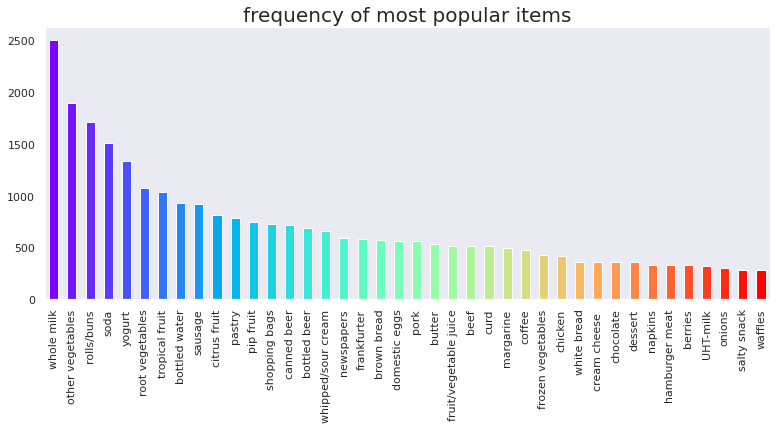

In [ ]:
# Again, plot a bar chart to review the top 40 items being sold
color = plt.cm.rainbow(np.linspace(0, 1, 40))
freq_bk.head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
# fill na as 'NA' to tranform every value into string 
bk.fillna('NA',inplace=True)
bk_2d = bk.values.tolist()
bk_2d[0]

['whole milk',
 'pastry',
 'salty snack',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA']

In [ ]:
# iterate every value which is not 'NA'
for i in range(len(bk_2d)):
    bk_2d[i] = [x for x in bk_2d[i] if not x=='NA']
bk_2d[0:5]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles']]

In [ ]:
# create a item matrix
TE = TransactionEncoder()
TE.fit(bk_2d)
item_matrix = TE.transform(bk_2d)
bk_item = pd.DataFrame(item_matrix, columns = TE.columns_)
print(bk_item.shape)
bk_item.head()

(14963, 167)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# get the support values by Apriori
bk_freq_items = apriori(bk_item, min_support=0.01, use_colnames=True, max_len=2)
bk_freq_items.sort_values(by = "support", ascending = False)

,support,itemsets
62,0.157923,(whole milk)
40,0.122101,(other vegetables)
46,0.110005,(rolls/buns)
52,0.097106,(soda)
63,0.085879,(yogurt)
...,...,...
64,0.010559,"(rolls/buns, other vegetables)"
29,0.010559,(herbs)
45,0.010493,(red/blush wine)
44,0.010158,(processed cheese)


In [ ]:
# get a dataframe with support, confidence, and lift values by Association Rules 
bk_rules = association_rules(bk_freq_items, metric = "confidence", min_threshold = 0)
bk_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
1,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
2,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
3,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
6,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
7,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
8,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
9,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638


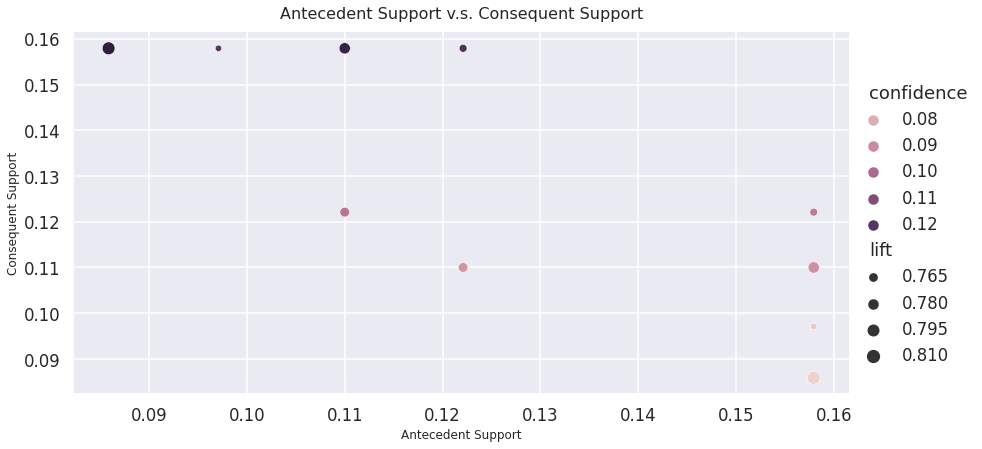

In [ ]:
# only 10 combinations when preparing it based on each transaction
sns.set_context("talk")
sns.relplot(x='antecedent support', y='consequent support', data=bk_rules, 
            size='lift', hue='confidence', height=6, aspect=2)
plt.title("Antecedent Support v.s. Consequent Support", fontsize=16, y=1.02)
plt.xlabel('Antecedent Support', fontsize=12)
plt.ylabel('Consequent Support', fontsize=12)
plt.show()

In [ ]:
# Add Zhang's values to complete the dataframe
bk_rules_zhangs_list = zhangs_rule(bk_rules)
bk_rules = bk_rules.assign(zhang = bk_rules_zhangs_list)
bk_rules['antecedents'] = bk_rules['antecedents'].apply(lambda a: ', '.join(list(a)))
bk_rules['consequents'] = bk_rules['consequents'].apply(lambda a: ', '.join(list(a)))
bk_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,rolls/buns,other vegetables,0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
1,other vegetables,rolls/buns,0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
2,other vegetables,whole milk,0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
3,whole milk,other vegetables,0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
4,rolls/buns,whole milk,0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986


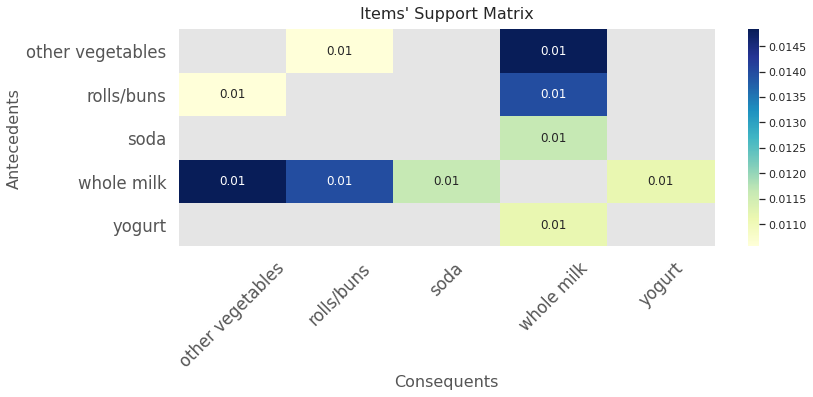

In [ ]:
# plot a heatmap to know how strong the association is based on lift values
bk_pivot_suport = bk_rules.pivot(index='antecedents', columns='consequents', values='support')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(12, 4))
sns.set()
ax = sns.heatmap(data=bk_pivot_suport, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Items' Support Matrix", fontsize=16, y=1.02)
ax.set_xlabel("Consequents",fontsize=16)
ax.set_ylabel("Antecedents",fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show() 

In [ ]:
# review the heatmap see whether whole milk is also the item with the highest confidence
bk_pivot_confi = bk_rules.pivot(index = 'antecedents', columns = 'consequents', values= 'confidence')

fig = go.Figure(data=go.Heatmap(x=bk_pivot_confi.columns, y=bk_pivot_confi.index, z=bk_pivot_confi, 
                                colorscale='ylgnbu', reversescale=False))
fig.update_layout(
    template='ggplot2',
    autosize=False,
    width=800,
    height=400,
    title="Confidence Matrix",
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="Black"
    )
)
fig.update_layout(title_x=0.5, title_y=0.86)
fig.show()

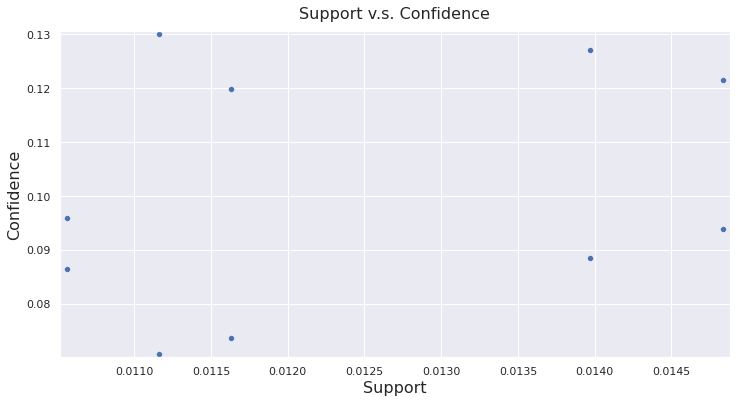

In [ ]:
# See the distribution of these 10 combinations
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x = "support", y = "confidence", data = bk_rules, alpha=1)
plt.title("Support v.s. Confidence", fontsize=16, y=1.02)
ax.set_xlabel("Support",fontsize=16)
ax.set_ylabel("Confidence",fontsize=16)
plt.margins(0.01,0.01)
plt.show()

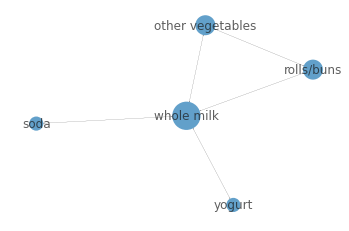

In [ ]:
bk_network = bk_rules[['antecedents', 'consequents']]

bk_network_G = nx.from_pandas_edgelist(
    bk_network,
    source = 'antecedents',
    target = 'consequents',
    create_using = nx.DiGraph())

network_bt = nx.in_degree_centrality(bk_network_G)
bk_network_bt = pd.DataFrame(list(network_bt.items()), columns = ['item', 'centrality'])
bk_network_bt = bk_network_bt.dropna(axis=0)

pos = nx.kamada_kawai_layout(bk_network_G)

sizes = [x[1]*100 for x in bk_network_G.degree()]

nx.draw_networkx(bk_network_G, pos, 
    with_labels = True, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

plt.axis('off')
plt.show()

# 5. Conclusion
In sum, here are viewpoints as below.

1. Top 10 sold items are whole milk, other vegetables, rolls/buns, soda, yogurt, root vegetables, tropical fruit, bottled water, sausage, and citrus fruit.

2. Top 5 consequents of whole milk are other vegetables, rolls/buns, soda, tropical fruit, and yogurt.

3. Every item in the top 10 percentile of all combinations has high confidence that customers buy the items with the whole wilk.

4. Regarding the network graphics, whole milk has the highest number of connections with other items.

5. Total items in these two datasets are the same. However, if generating a basket analysis dataframe based on each transaction, the number of combinations would be fewer than creating it based on customer IDs.

Suggested further analysis.

1. Since there is a dataset with transaction dates and customer IDs, the dataset can also proceed with a sales trend or customer behavior analysis.

2. Choose other items to explore what consequents should be prepared in order to prevent product insufficiency.

3. Other visual types to explore more insights.